In [315]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly

#plotly configuration
import plotly.offline as py

from math import ceil

#Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [316]:
train = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
prices = pd.read_csv('sell_prices.csv')
test = pd.read_csv('sales_train_evaluation.csv')

In [317]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [318]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [319]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [320]:
date_price = prices.merge(calendar, on=['wm_yr_wk'], how = 'inner')

In [321]:
date_price.head()

,store_id,item_id,wm_yr_wk,sell_price,date,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,CA_1,HOBBIES_1_001,11325,9.58,2013-07-13,Saturday,1,7,2013,d_897,NaN,NaN,NaN,NaN,0,1,0
1,CA_1,HOBBIES_1_001,11325,9.58,2013-07-14,Sunday,2,7,2013,d_898,NaN,NaN,NaN,NaN,0,0,1
2,CA_1,HOBBIES_1_001,11325,9.58,2013-07-15,Monday,3,7,2013,d_899,NaN,NaN,NaN,NaN,0,1,1
3,CA_1,HOBBIES_1_001,11325,9.58,2013-07-16,Tuesday,4,7,2013,d_900,NaN,NaN,NaN,NaN,0,0,0
4,CA_1,HOBBIES_1_001,11325,9.58,2013-07-17,Wednesday,5,7,2013,d_901,NaN,NaN,NaN,NaN,0,0,0


In [322]:
date_price.shape

(47735397, 17)

In [323]:
TARGET = 'sales'        
END_TRAIN = 1913         
KEY_INDEX = ['id','d']

In [324]:
index_columns = ['id','item_id','dept_id','cat_id','store_id','state_id']
data_df = pd.melt(train, 
                  id_vars = index_columns, 
                  var_name = 'd', 
                  value_name = TARGET)

In [325]:
grid_test = pd.DataFrame()
for i in range(1,29):
    temp_df = train[index_columns]
    temp_df = temp_df
    temp_df['d'] = 'd_'+ str(END_TRAIN+i) 
    temp_df[TARGET] = np.nan
    grid_test = pd.concat([grid_test,temp_df])

/var/folders/4n/jdlmlz3172b2_7xcl0_55ns40000gn/T/ipykernel_89954/3701871016.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4n/jdlmlz3172b2_7xcl0_55ns40000gn/T/ipykernel_89954/3701871016.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
data_df = pd.concat([data_df,grid_test])
data_df = data_df.reset_index(drop=True) 

In [327]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0


In [328]:
del temp_df, grid_test

In [329]:
for col in index_columns:
    data_df[col] = data_df[col].astype('category')

In [330]:
def merge_by_concat(df1, df2, merge_on):
    merged_gf = df1[merge_on]
    merged_gf = merged_gf.merge(df2, on=merge_on, how='left')
    new_columns = [col for col in list(merged_gf) if col not in merge_on]
    df1 = pd.concat([df1, merged_gf[new_columns]], axis=1)
    return df1

In [331]:
release_df = prices.groupby(['store_id','item_id'])['wm_yr_wk'].agg(['min']).reset_index()
release_df.columns = ['store_id','item_id','release']
data_df = merge_by_concat(data_df, release_df, ['store_id','item_id'])
del release_df

In [332]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11325
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11121
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11401
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11106
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11117


In [333]:
data_df = merge_by_concat(data_df, calendar[['wm_yr_wk','d']], ['d'])
data_df = data_df[data_df['wm_yr_wk']>=data_df['release']] 
data_df = data_df.reset_index(drop=True)

In [334]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,11101,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,11101,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11101,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11101,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,11101,11101


In [336]:
data_df['release'] = data_df['release'] - data_df['release'].min()
data_df['release'] = data_df['release'].astype(np.int16)

In [337]:
data_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101
...,...,...,...,...,...,...,...,...,...,...
46881672,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,0,11617
46881673,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,0,11617
46881674,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,0,11617
46881675,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,230,11617


In [22]:
print('Saving Part 1 as pickle')
data_df.to_pickle('grid_part_1.pkl')
print('Done! Size of part 1:', data_df.shape)
del data_df

Saving Part 1 as pickle
Done! Size of part 1: (46881677, 10)


In [23]:
data_df = pd.read_pickle('grid_part_1.pkl')

In [24]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101


In [25]:
prices['price_max'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('max')
prices['price_min'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('min')
prices['price_std'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('std')
prices['price_mean'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('mean')

# Normalization
prices['price_norm'] = prices['sell_price']/prices['price_max']

prices['price_nunique'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('nunique')
    
prices['item_nunique'] = prices.groupby(['store_id','sell_price'])['item_id'].transform('nunique')

In [26]:
calendar_prices = calendar[['wm_yr_wk','month','year']].drop_duplicates(subset=['wm_yr_wk'])

prices = prices.merge(calendar_prices[['wm_yr_wk','month','year']], on=['wm_yr_wk'], how='left')

del calendar_prices

In [27]:
prices['price_momentum'] = prices['sell_price']/prices.groupby(['store_id','item_id'])['sell_price'].transform(lambda x: x.shift(1))


prices['price_momentum_m'] = prices['sell_price']/prices.groupby(['store_id','item_id','month'])['sell_price'].transform('mean')


prices['price_momentum_y'] = prices['sell_price']/prices.groupby(['store_id','item_id','year'])['sell_price'].transform('mean')
# del prices['month'], prices['year']

In [28]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,month,year,price_momentum,price_momentum_m,price_momentum_y
0,CA_1,HOBBIES_1_001,11325,9.58,9.58,8.26,0.152139,8.285714,1.000000,3,3,7,2013,NaN,1.127059,1.145166
1,CA_1,HOBBIES_1_001,11326,9.58,9.58,8.26,0.152139,8.285714,1.000000,3,3,7,2013,1.000000,1.127059,1.145166
2,CA_1,HOBBIES_1_001,11327,8.26,9.58,8.26,0.152139,8.285714,0.862213,3,5,7,2013,0.862213,0.971765,0.987377
3,CA_1,HOBBIES_1_001,11328,8.26,9.58,8.26,0.152139,8.285714,0.862213,3,5,8,2013,1.000000,1.000000,0.987377
4,CA_1,HOBBIES_1_001,11329,8.26,9.58,8.26,0.152139,8.285714,0.862213,3,5,8,2013,1.000000,1.000000,0.987377


In [29]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101


In [30]:
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)


def get_memory_usage():
    return np.round(psutil.Process(os.getpid()).memory_info()[0]/2.**30, 2) 


def reduce_mem_usage(df, verbose=True):
    # df: pandas dataframe to reduce size             
    # verbose: whether output
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min() # Get the minimum data type in whole pandas dataframe
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                       
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Memory usage decreased to {:5.2f} Mb now, with ({:.1f}% reduction saved)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [31]:
print('Merge prices')
original_columns = list(data_df) 
data_df = data_df.merge(prices, on=['store_id','item_id','wm_yr_wk'], how='left')
keep_columns = [col for col in list(data_df) if col not in original_columns]
data_df = data_df[KEY_INDEX+keep_columns]
data_df = reduce_mem_usage(data_df)

Merge prices
Memory usage decreased to 1878.05 Mb now, with (65.6% reduction saved)


In [32]:
data_df.to_pickle('grid_part_2.pkl')
print('Size:', data_df.shape)

del data_df


Size: (46881677, 15)


In [33]:
data_df = pd.read_pickle('grid_part_1.pkl')
data_df = data_df[KEY_INDEX]

In [34]:
icols = ['date',
         'd',
         'event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2',
         'snap_CA',
         'snap_TX',
         'snap_WI']

data_df = data_df.merge(calendar[icols], on=['d'], how='left')

In [35]:
icols = ['event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2',
         'snap_CA',
         'snap_TX',
         'snap_WI'] 
for col in icols:
    data_df[col] = data_df[col].astype('category')

In [36]:
data_df.head()

,id,d,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_008_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_009_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_010_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_012_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_015_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0


In [37]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['tm_d'] = data_df['date'].dt.isocalendar().day.astype(np.int8) # tm stands for time
data_df['tm_w'] = data_df['date'].dt.isocalendar().week.astype(np.int8)
data_df['tm_m'] = data_df['date'].dt.month.astype(np.int8)
data_df['tm_y'] = data_df['date'].dt.isocalendar().year
data_df['tm_y'] = (data_df['tm_y'] - data_df['tm_y'].min()).astype(np.int8)
data_df['tm_wm'] = data_df['tm_d'].apply(lambda x: ceil(x/7)).astype(np.int8)
data_df['tm_dw'] = data_df['date'].dt.dayofweek.astype(np.int8) 
data_df['tm_w_end'] = (data_df['tm_dw']>=5).astype(np.int8) 

# del data_df['date']

In [41]:
print('Save part 3')
data_df.to_pickle('grid_part_3.pkl')
print('Size:', data_df.shape)

del data_df

Save part 3
Size: (46881677, 37)


data_df = pd.read_pickle('grid_part_1.pkl')
data_df['d'] = data_df['d'].apply(lambda x: x[2:]).astype(np.int16)

del data_df['wm_yr_wk']

data_df.to_pickle('grid_part_1.pkl')
del data_df

In [357]:
data_df = pd.concat([pd.read_pickle('grid_part_1.pkl'),
                     pd.read_pickle('grid_part_2.pkl').iloc[:,2:],
                     pd.read_pickle('grid_part_3.pkl').iloc[:,2:]],
                     axis=1)

In [358]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,...,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1,12.0,0,0.459961,...,0,0,0,6,4,1,0,1,5,1
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,1,2.0,0,1.559570,...,0,0,0,6,4,1,0,1,5,1
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,1,0.0,0,3.169922,...,0,0,0,6,4,1,0,1,5,1
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,1,0.0,0,5.980469,...,0,0,0,6,4,1,0,1,5,1
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,1,4.0,0,0.700195,...,0,0,0,6,4,1,0,1,5,1


In [359]:
data_df = data_df.loc[:, ~data_df.columns.duplicated()]

In [360]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46881677 entries, 0 to 46881676
Data columns (total 37 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                category      
 1   item_id           category      
 2   dept_id           category      
 3   cat_id            category      
 4   store_id          category      
 5   state_id          category      
 6   d                 int16         
 7   sales             float64       
 8   release           int16         
 9   sell_price        float16       
 10  price_max         float16       
 11  price_min         float16       
 12  price_std         float16       
 13  price_mean        float16       
 14  price_norm        float16       
 15  price_nunique     int8          
 16  item_nunique      int16         
 17  month             int8          
 18  year              int16         
 19  price_momentum    float16       
 20  price_momentum_m  float16       
 21  price_

In [363]:
forc = data_df.loc[:,['price_mean','date']]

In [179]:
forc = forc.loc[:, ~forc.columns.duplicated()]

In [364]:
forc

,price_mean,date
0,0.476318,2011-01-29
1,1.764648,2011-01-29
2,2.980469,2011-01-29
3,6.468750,2011-01-29
4,0.706543,2011-01-29
...,...,...
46881672,2.800781,2016-05-22
46881673,2.507812,2016-05-22
46881674,4.117188,2016-05-22
46881675,1.280273,2016-05-22


In [365]:
forc = forc.dropna()

In [382]:
# rename the columns to match the required format
forc = forc.rename(columns={'date': 'ds', 'price_mean': 'y'})

In [383]:
forc['ds'] = pd.to_datetime(forc['ds'])


In [384]:
forc

,y,ds
0,0.476318,2011-01-29
1,1.764648,2011-01-29
2,2.980469,2011-01-29
3,6.468750,2011-01-29
4,0.706543,2011-01-29
...,...,...
46881672,2.800781,2016-05-22
46881673,2.507812,2016-05-22
46881674,4.117188,2016-05-22
46881675,1.280273,2016-05-22


In [385]:
sampled_df = forc.sample(n=100, random_state=42)

In [386]:
train_size = int(len(sampled_df) * 0.8)
train_df = sampled_df[:train_size]
test_df = sampled_df[train_size:]

# Prophet

In [387]:
from fbprophet import Prophet

# initialize the model
model = Prophet(yearly_seasonality=True)



In [388]:
# fit the model to the training data
m = model.fit(train_df)

import pickle
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

future = model.make_future_dataframe(periods=52, freq='W-Fri')
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -108.536
Iteration  1. Log joint probability =    69.6409. Improved by 178.177.
Iteration  2. Log joint probability =    97.2543. Improved by 27.6134.
Iteration  3. Log joint probability =    109.916. Improved by 12.6617.
Iteration  4. Log joint probability =    111.477. Improved by 1.56124.
Iteration  5. Log joint probability =    111.733. Improved by 0.255395.
Iteration  6. Log joint probability =     111.74. Improved by 0.00744267.
Iteration  7. Log joint probability =    111.757. Improved by 0.0171337.
Iteration  8. Log joint probability =     111.79. Improved by 0.0331129.
Iteration  9. Log joint probability =    111.831. Improved by 0.0411907.
Iteration 10. Log joint probability =    111.854. Improved by 0.0229889.
Iteration 11. Log joint probability =    111.856. Improved by 0.00116762.
Iteration 12. Log joint probability =    112.156. Improved by 0.300658.
Iteration 13. Log joint probability =    112.175. Improved by 0.0191059.
Iteration 14. Log

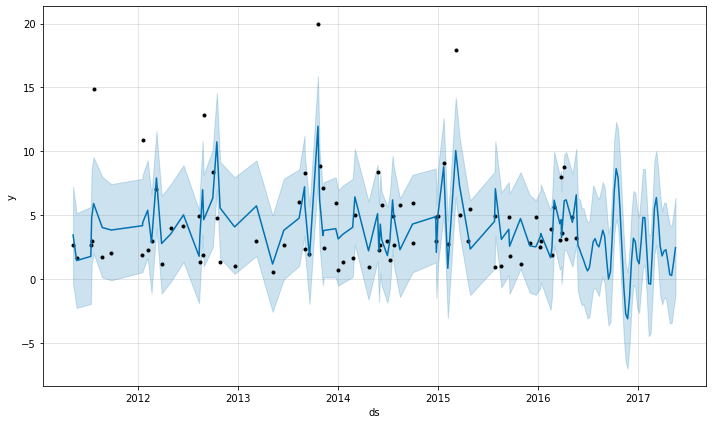

In [389]:
fig = model.plot(forecast)

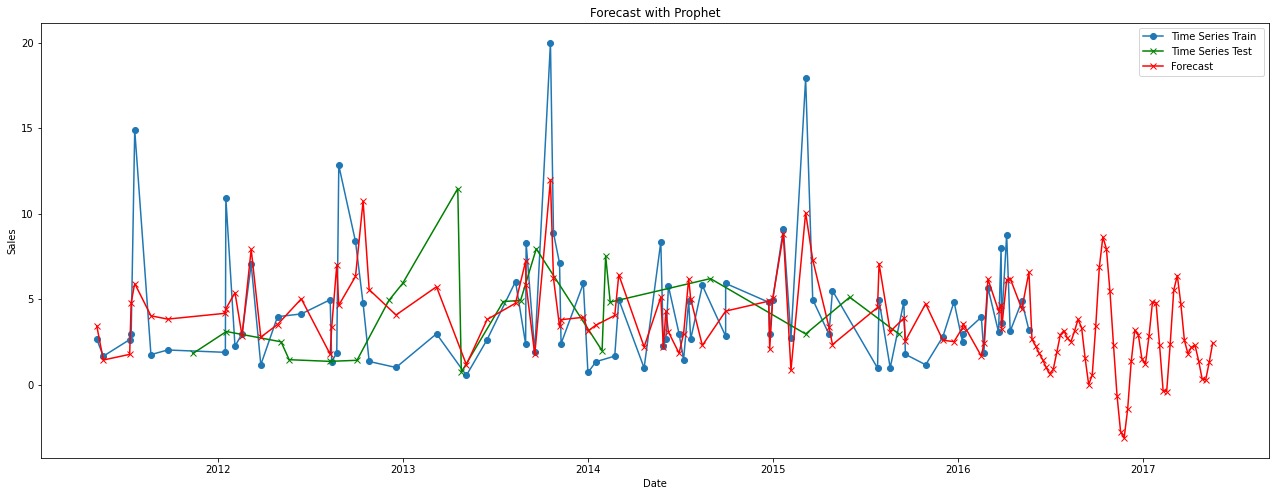

In [390]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))

train_df = train_df.sort_values('ds')
test_df = test_df.sort_values('ds')
plt.plot(train_df['ds'], train_df['y'], 'o-')

plt.plot(test_df['ds'], test_df['y'], 'x-', color='green')
plt.plot(forecast["ds"], forecast["yhat"], "x-", color="red")

plt.legend(['Time Series Train ','Time Series Test','Forecast'])
plt.title("Forecast with Prophet")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

In [391]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

# Set the number of days to forecast
forecast_horizon = 30

# Define the cross-validation parameters
cv_initial = 365  # Initial training period (days)
cv_period = 180   # Length of the testing period (days)
cv_horizon = 30   # Forecast horizon (days)

# Perform cross-validation
df_cv = cross_validation(m, initial=str(cv_initial) + ' days', period=str(cv_period) + ' days', horizon=str(cv_horizon) + ' days')

# Calculate the performance metrics
df_perf = performance_metrics(df_cv)
rmse = df_perf['rmse']


INFO:prophet:Making 8 forecasts with cutoffs between 2012-08-10 00:00:00 and 2016-04-21 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 11.



Initial log joint probability = -80.9168
Iteration  1. Log joint probability =    10.8103. Improved by 91.7271.
Iteration  2. Log joint probability =    20.8326. Improved by 10.0223.
Iteration  3. Log joint probability =     31.709. Improved by 10.8764.
Iteration  4. Log joint probability =    35.1943. Improved by 3.48533.
Iteration  5. Log joint probability =    51.9253. Improved by 16.731.
Iteration  6. Log joint probability =    61.6448. Improved by 9.7195.
Iteration  7. Log joint probability =    63.7459. Improved by 2.10112.
Iteration  8. Log joint probability =    81.4775. Improved by 17.7315.
Iteration  9. Log joint probability =    91.5989. Improved by 10.1214.
Iteration 10. Log joint probability =    101.731. Improved by 10.1318.
Iteration 11. Log joint probability =    113.558. Improved by 11.8271.
Iteration 12. Log joint probability =    124.335. Improved by 10.7773.
Iteration 13. Log joint probability =    135.169. Improved by 10.8342.
Iteration 14. Log joint probability =

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_266569703482361291.PyStanHolder'> returned a result with an error set

In [ ]:
rmse.min()

# ARIMA

In [392]:
from statsmodels.tsa.arima.model import ARIMA

In [393]:
sampled_df2 = forc.sample(n=2000, random_state=42)
sampled_df2 = sampled_df2.sort_values("ds")
sampled_df2 = sampled_df2.set_index("ds")


In [394]:
sampled_df2

,y
ds,
2011-01-29,2.980469
2011-01-29,2.695312
2011-01-30,1.378906
2011-01-30,3.248047
2011-01-30,0.563477
...,...
2016-05-20,8.781250
2016-05-21,3.177734
2016-05-21,0.979980


In [395]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sampled_df2["y"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -33.65778551960565
p-value: 0.0


In [396]:
data_diff = sampled_df2["y"].diff().dropna()


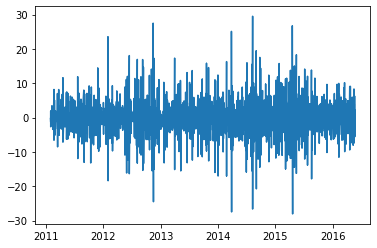

In [397]:
plt.plot(data_diff)
plt.show()


In [398]:
result_diff = adfuller(data_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])


ADF Statistic: -14.833694589278629
p-value: 1.88239202025375e-27


In [399]:
model = ARIMA(sampled_df2["y"], order=(1,2,1))
results = model.fit()


/Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [400]:
import pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(results, f)

In [401]:
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -5819.189
Date:                Thu, 27 Apr 2023   AIC                          11644.378
Time:                        10:55:10   BIC                          11661.178
Sample:                             0   HQIC                         11650.547
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4864      0.013    -36.289      0.000      -0.513      -0.460
ma.L1         -0.9997      0.105     -9.486      0.000      -1.206      -0.793
sigma2        19.7469      1.969     10.027      0.0

In [402]:
sampled_df2.tail(200)

,y
ds,
2015-12-15,7.093750
2015-12-16,1.980469
2015-12-17,2.773438
2015-12-17,4.980469
2015-12-18,2.416016
...,...
2016-05-20,8.781250
2016-05-21,3.177734
2016-05-21,0.979980


In [403]:
start_index = len(sampled_df2['y']) - 200
start_element = sampled_df2.index[-200]

end_index = len(sampled_df2['y'])
end_element = sampled_df2.index[-1]

predictions = results.predict(start=start_element, end=end_element)


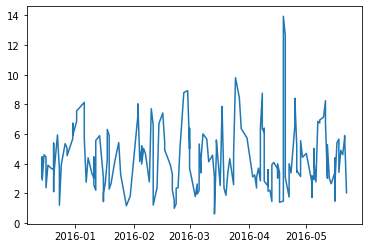

In [404]:
plt.plot(predictions)
plt.show()


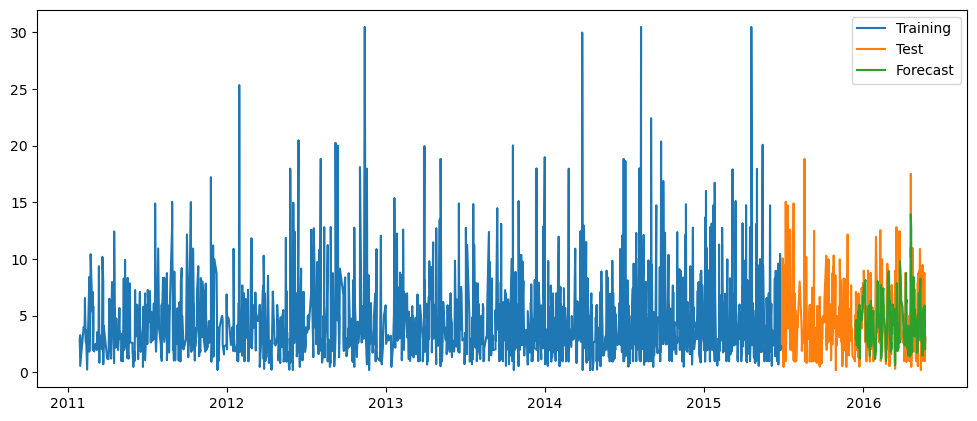

In [405]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sampled_df2[:][:1600].index,sampled_df2[:][:1600].values, label='Training')
plt.plot(sampled_df2[:][1600:].index, sampled_df2[:][1600:].values, label='Test')
plt.plot(predictions.index, predictions.values, label='Forecast')
plt.legend()
plt.show()


plt.figure(figsize=(12,5), dpi=100)
plt.plot(sampled_df2[:][:1600], label='training')
plt.plot(sampled_df2[:][1600:], color = 'blue')
plt.plot(predictions[1600:], color = 'orange')

plt.show()

In [407]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = sampled_df2['y'][:201] # actual values
y_pred = predictions # predicted values

rmse = sqrt(mean_squared_error(y_true, y_pred))

In [408]:
rmse

3.832138502175022

# LightGBM

In [409]:
import random
SEED = 42             # Our random seed for everything
random.seed(SEED)     # to make all tests "deterministic"
np.random.seed(SEED)
TARGET = 'sales'      # Our Target
END_TRAIN = 1913      # And we will use last 28 days as validation

In [413]:
keep_id = np.array_split(list(data_df['id'].unique()), 10)[0]


sampled = data_df.sample(n=1000, random_state=42)
sampled.to_csv('data.csv')
sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1231 to 1789
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1000 non-null   category      
 1   item_id           1000 non-null   category      
 2   dept_id           1000 non-null   category      
 3   cat_id            1000 non-null   category      
 4   store_id          1000 non-null   category      
 5   state_id          1000 non-null   category      
 6   d                 1000 non-null   int16         
 7   sales             1000 non-null   float64       
 8   release           1000 non-null   int16         
 9   sell_price        1000 non-null   float16       
 10  price_max         1000 non-null   float16       
 11  price_min         1000 non-null   float16       
 12  price_std         1000 non-null   float16       
 13  price_mean        1000 non-null   float16       
 14  price_norm        100

In [411]:
data_df = data_df[data_df['d'].index<=END_TRAIN].reset_index(drop=True)
remove_features = ['id','d',TARGET]
import lightgbm as lgb
lgb_params = {
                    'boosting_type': 'gbdt',         # Standart boosting type
                    'objective': 'regression',       # Standart loss for RMSE
                    'metric': ['rmse'],              # as we will use rmse as metric "proxy"
                    'subsample': 0.8,                
                    'subsample_freq': 1,
                    'learning_rate': 0.05,           # 0.5 is "fast enough" for us
                    'num_leaves': 2**7-1,            # We will need model only for fast check
                    'min_data_in_leaf': 2**8-1,      # So we want it to train faster even with drop in generalization 
                    'feature_fraction': 0.8,
                    'n_estimators': 5000,            # We don't want to limit training (you can change 5000 to any big enough number)
                    'early_stopping_rounds': 30,     # We will stop training almost immediately (if it stops improving) 
                    'seed': SEED,
                    'verbose': -1,
                } 

def rmse(y, y_pred):
    '''
    Return RMSE to assess performance
    '''
    return np.sqrt(np.mean(np.square(y - y_pred)))

def make_fast_test(df,params=lgb_params):

    features_columns = [col for col in list(df) if col not in remove_features]
    

    tr_x, tr_y = df[df['d']<=(END_TRAIN-28)][features_columns], df[df['d']<=(END_TRAIN-28)][TARGET]              
    vl_x, vl_y = df[df['d']>(END_TRAIN-28)][features_columns], df[df['d']>(END_TRAIN-28)][TARGET]
    
    train_data = lgb.Dataset(tr_x, label = tr_y)
    valid_data = lgb.Dataset(vl_x, label = vl_y)
    
    estimator = lgb.train(  params,
                            train_data,
                            valid_sets = [train_data,valid_data],
                            verbose_eval = 500)
    return estimator

# Make baseline model
baseline_model = make_fast_test(data_df)

OSError: dlopen(/Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <D21A7969-4567-3BC7-94ED-6A9E83AE9D78> /Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [208]:
!pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_0_x86_64.whl (1.3 MB)


In [212]:
import pandas as pd
import lightgbm as lgb

lgb_params = {
                    'boosting_type': 'gbdt',         # Standart boosting type
                    'objective': 'regression',       # Standart loss for RMSE
                    'metric': ['rmse'],              # as we will use rmse as metric "proxy"
                    'subsample': 0.8,                
                    'subsample_freq': 1,
                    'learning_rate': 0.05,           # 0.5 is "fast enough" for us
                    'num_leaves': 2**7-1,            # We will need model only for fast check
                    'min_data_in_leaf': 2**8-1,      # So we want it to train faster even with drop in generalization 
                    'feature_fraction': 0.8,
                    'n_estimators': 5000,            # We don't want to limit training (you can change 5000 to any big enough number)
                    'early_stopping_rounds': 30,     # We will stop training almost immediately (if it stops improving) 
                    'seed': SEED,
                    'verbose': -1,
                } 

OSError: dlopen(/Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <D21A7969-4567-3BC7-94ED-6A9E83AE9D78> /Users/kratichoudhary/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [ ]:
feature_cols = ['release', 'sell_price', 'price_max', 'price_min', 'price_std', 'price_mean', 'price_norm', 'price_nunique', 'item_nunique', 'month', 'year', 'price_momentum', 'price_momentum_m', 'price_momentum_y']
target_col = 'sales'
train_dataset = lgb.Dataset(sampled_df2[feature_cols], label=sampled_df2[target_col])


# LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
